<a href="https://colab.research.google.com/github/ambgeo/Youtube/blob/main/01_Rasterio_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calcule NDVI utilizando Rasterio**

baixar dados em https://code.earthengine.google.com/f39dc1edf09cc829ca98a28a02b8be7b

In [1]:
#Instalar pacote
!pip install rasterio -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 17.4 MB/s eta 0:00:00


In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

In [4]:
# Defina o caminho para a sua imagem
image_path = '/content/drive/MyDrive/GEE_Exports/S2_Median_BBands.tif'  # Altere aqui para o caminho correto!

# Abrir a imagem com Rasterio
src = rasterio.open(image_path)

# Mostrar as informações básicas da imagem
print(src.profile)


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 3456, 'height': 3132, 'count': 11, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, -47.64206126175041,
       0.0, -8.983152841195215e-05, -16.71423383938464), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


In [5]:
# Lendo a banda Vermelho (Red)
red = src.read(3)

# Lendo a banda Infravermelho Próximo (NIR)
nir = src.read(4)


Calcular o NDVI
A fórmula do NDVI é:

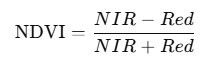

In [6]:
# Calculando o NDVI
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)

# Tratando possíveis divisões por zero
ndvi = np.nan_to_num(ndvi)

# Mostrar estatísticas do NDVI
print("NDVI mínimo:", ndvi.min())
print("NDVI máximo:", ndvi.max())

NDVI mínimo: -0.5648000091314316
NDVI máximo: 0.468314097234917


In [8]:
# Preparar o perfil para salvar
profile = src.profile
profile.update(dtype=rasterio.float32, count=1)

# Definir o caminho de saída para o NDVI
ndvi_output_path = 'ndvi_resultado.tif'  # Altere aqui!

# Salvar o NDVI
with rasterio.open(ndvi_output_path, 'w', **profile) as dst:
    dst.write(ndvi.astype(rasterio.float32), 1)

print(f"NDVI salvo em: {ndvi_output_path}")


NDVI salvo em: ndvi_resultado.tif


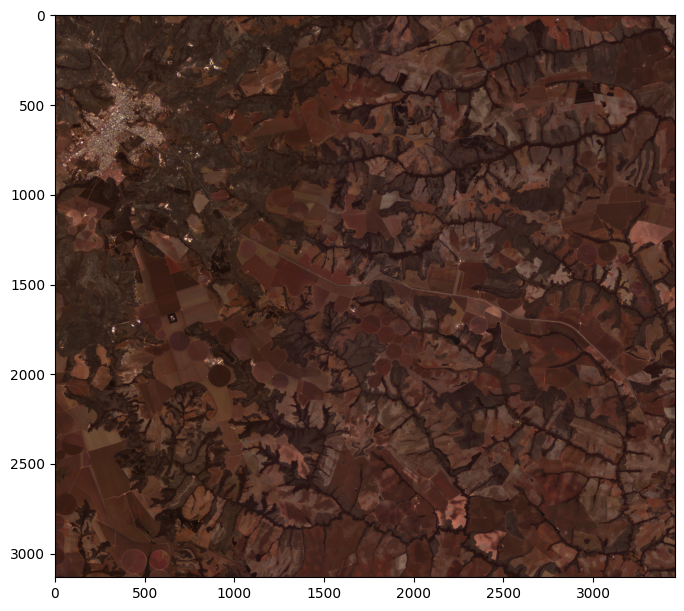

In [13]:
# Montar a imagem RGB
rgb = np.stack([
    src.read(3),  # Red
    src.read(2),  # Green
    src.read(1)   # Blue
])

# Exibir a imagem RGB
plt.figure(figsize=(8, 8))
show(rgb*4)
plt.show()


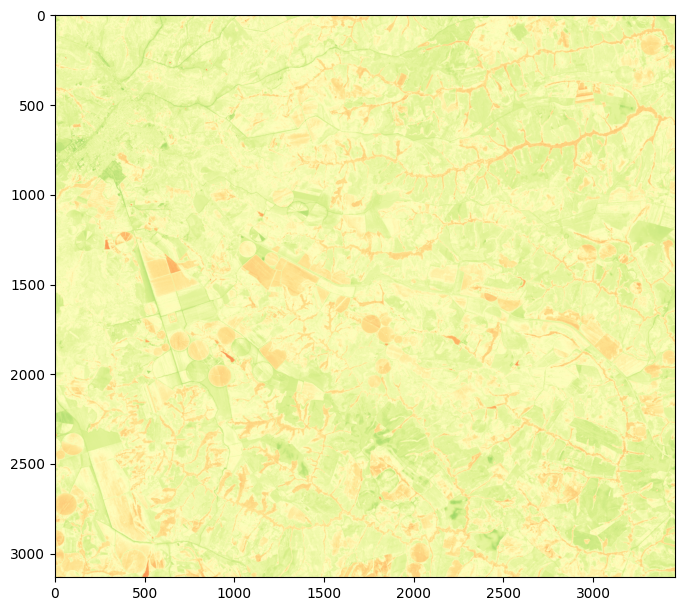

In [14]:
# Abrir o NDVI salvo
ndvi_src = rasterio.open(ndvi_output_path)
ndvi_data = ndvi_src.read(1)

# Exibir o NDVI
plt.figure(figsize=(8, 8))
show(ndvi_data, cmap='RdYlGn', vmin=-1, vmax=1)
plt.show()


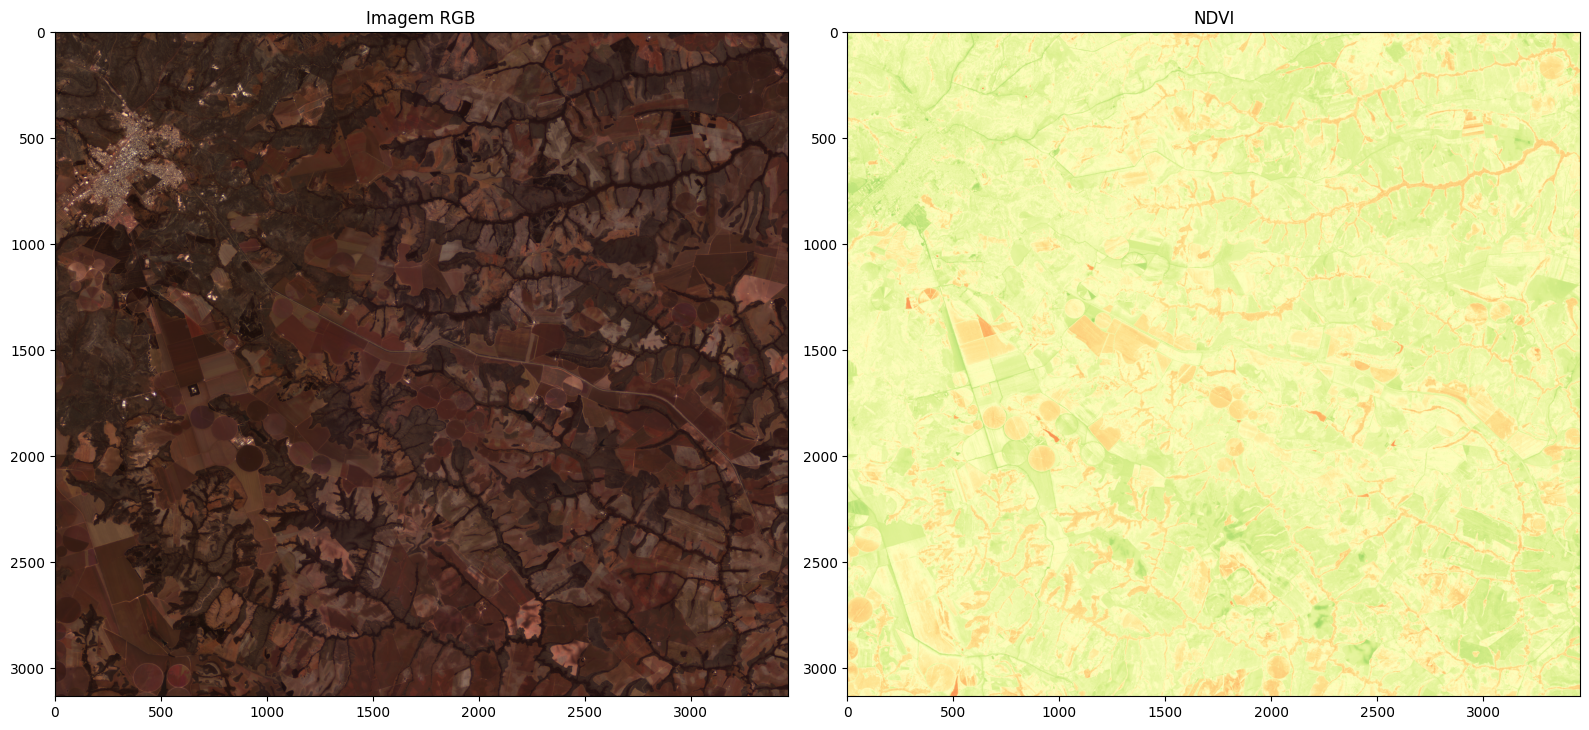

In [16]:
# Plotar os dois juntos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# RGB
show(rgb*4, ax=ax1)
ax1.set_title('Imagem RGB')

# NDVI
show(ndvi_data, ax=ax2, cmap='RdYlGn', vmin=-1, vmax=1)
ax2.set_title('NDVI')

plt.tight_layout()
plt.show()
